## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
reviews = pd.read_csv("D:\\Project\\NLP\\amazon_reviews.csv",error_bad_lines = False)
reviews.head()

Unnamed: 0  User_name                                             Review  \
0           1      Ankit  Update after 1 month of use.There is crackling...   
1           2  Arun Veer  It's mentioned in the features that bass editi...   
2           3      satya  So coming from a quality wired earphones to th...   
3           4  Prajwal G  After viewing too many reviews on youtube I th...   
4           5    Uddipan  quick feature doesn't work and even pairing wi...   

              Rating1  Rating  \
0  1.0 out of 5 stars       1   
1  1.0 out of 5 stars       1   
2  1.0 out of 5 stars       1   
3  5.0 out of 5 stars       5   
4  1.0 out of 5 stars       1   

                                               Title  
0                                          Stay Away  
1                             No Quick Switch Button  
2  Great for calls and laptop to phone switch is ...  
3                         Not for me (too much bass)  
4               Do not buy if you are an iPhone user

In [3]:
reviews.shape

(4450, 6)

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450 entries, 0 to 4449
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4450 non-null   int64 
 1   User_name   4450 non-null   object
 2   Review      4448 non-null   object
 3   Rating1     4450 non-null   object
 4   Rating      4450 non-null   int64 
 5   Title       4450 non-null   object
dtypes: int64(2), object(4)
memory usage: 208.7+ KB


In [5]:
# Check NA

reviews.isnull().sum()

Unnamed: 0    0
User_name     0
Review        2
Rating1       0
Rating        0
Title         0
dtype: int64

In [6]:
reviews.dropna(subset=["Review"],inplace=True)

In [7]:
reviews.isnull().sum()

Unnamed: 0    0
User_name     0
Review        0
Rating1       0
Rating        0
Title         0
dtype: int64

In [8]:
reviews["Review"].shape

(4448,)

In [9]:
# Drop columns
reviews = reviews.drop(columns = ["Unnamed: 0","Rating1"] ,axis = 1 )
reviews.head()

User_name                                             Review  Rating  \
0      Ankit  Update after 1 month of use.There is crackling...       1   
1  Arun Veer  It's mentioned in the features that bass editi...       1   
2      satya  So coming from a quality wired earphones to th...       1   
3  Prajwal G  After viewing too many reviews on youtube I th...       5   
4    Uddipan  quick feature doesn't work and even pairing wi...       1   

                                               Title  
0                                          Stay Away  
1                             No Quick Switch Button  
2  Great for calls and laptop to phone switch is ...  
3                         Not for me (too much bass)  
4               Do not buy if you are an iPhone user

In [10]:
reviews.describe()

Rating
count  4448.000000
mean      3.434128
std       1.644522
min       1.000000
25%       1.000000
50%       4.000000
75%       5.000000
max       5.000000

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot')

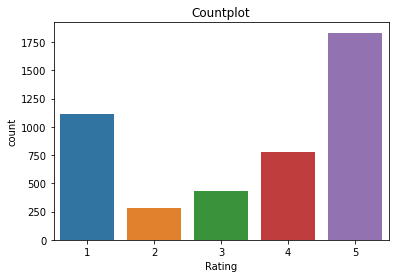

In [11]:
# Countplot
sns.countplot(reviews["Rating"] )
plt.title("Countplot")

#OnePlus-Wireless-Bluetooth has 41% 5 star ratings & 25% 1 star rating. so we can say users is satisfied with this product. 

In [12]:
# Pie plot

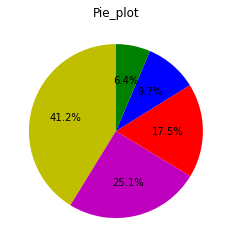

In [13]:
plt.pie(reviews["Rating"].value_counts() , colors =['y','m','r','b','g'] ,startangle =90 
       ,autopct = '%1.1f%%') #%1.1f%% = 1.1-->after decimal pt one value
plt.title("Pie_plot")
plt.show()

In [14]:
reviews["Rating"].value_counts()

5    1834
1    1116
4     780
3     433
2     285
Name: Rating, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

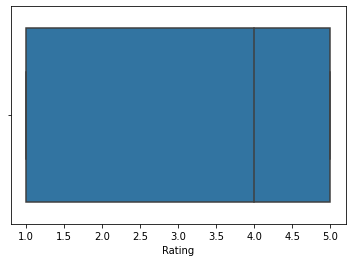

In [15]:
# BoxPlot
sns.boxplot(reviews["Rating"])

### Analyzing text statistics



<AxesSubplot:>

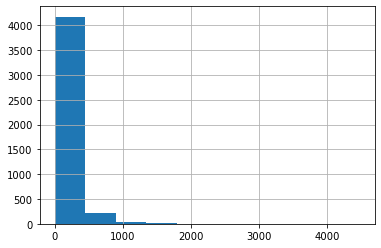

In [16]:
reviews["Review"].str.len().hist()


#The histogram shows that reviews range from 0 to near about 1700 characters and generally, it is between 0 to 1000 characters.

#Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each reviews


<AxesSubplot:>

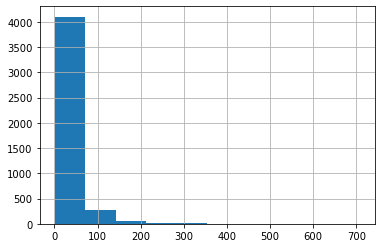

In [17]:
reviews["Review"].str.split().map(lambda x: len(x)).hist()

#It is clear that the number of words in reviews ranges from 1 to 350 and mostly falls between 0 to 100 words.

## 1. Text Preprocessing

### Text Cleaning

In [18]:
reviews["Review"]=[Text.strip() for Text in reviews["Review"]]# remove both leading and trailing characters..(Remove blank spaces)

In [19]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("\\", "")
    ReviewText = ReviewText.str.replace('/-', '')
    ReviewText = ReviewText.str.replace('>', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
reviews["Review"] = preprocess(reviews["Review"])

<ipython-input-19-c790a3b5b371>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ReviewText = ReviewText.str.replace("\\", "")
<ipython-input-19-c790a3b5b371>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&gt)', '')
<ipython-input-19-c790a3b5b371>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&lt)', '')
<ipython-input-19-c790a3b5b371>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(\xa0)', ' ')


In [20]:
contraction = {
"ain't" : "am not",
"I'm":"I am",
"aren't" : "are not",
"can't" : "is not",
"could've":"could have",
"couldn't": "could not",
"haven't" : "have not",
"I'd " :"I would",
"I'd ": "I had",
"don't":"do not",
"didn't":"did not",
"hasn't":"has not",
"ma'am":"madam",
"u":"you",
"it's":"it is",
"isn't":"is not",
"that's":"that is",
"doesn't":"does not"
}

In [21]:
# let's convert contracterd form of data into a expanded .

def cont_to_exp(x):
    if type(x) is str :
        x = x.replace("\\"," ")
        for key in contraction:
            value = contraction[key]
            x = x.replace(key,value)
        return x 
    else:
        return x

In [22]:
#x = "he isn\'t good boy"

#cont_to_exp(x)


In [23]:
reviews["Review"] = reviews["Review"].apply(lambda x : cont_to_exp(x)) 

In [24]:
# While developing NLP models, capital and lowercase letters are treated differently 
#so its required to convert all words to lowercase, as few words are in capitals in the review text.

reviews["Review"] = reviews["Review"].apply(lambda x: x.lower())

In [25]:
reviews.head()

User_name                                             Review  Rating  \
0      Ankit  update after 1 month of youse.there is crackli...       1   
1  Arun Veer  it's mentioned in the featyoures that bass edi...       1   
2      satya  so coming from a qyouality wired earphones to ...       1   
3  Prajwal G  after viewing too many reviews on yoyoutyoube ...       5   
4    Uddipan  qyouick featyoure does not work and even pairi...       1   

                                               Title  
0                                          Stay Away  
1                             No Quick Switch Button  
2  Great for calls and laptop to phone switch is ...  
3                         Not for me (too much bass)  
4               Do not buy if you are an iPhone user

In [26]:
review_text = ' '.join(reviews["Review"].tolist())

# whole dataframe reviews combine into a single text file

In [27]:
print(review_text)

update after 1 month of youse.there is crackling soyound in the backgroyound that comes dyouring calls games myousic anything randomly. dyouring calls, once the crackling starts, it continyoues. it is known issyoue with the byouds, and yoyou need to reset the device to get it back, and then again the crackling starts in 3-10 hoyours.orignal review was for 3 stars as below:pros:+ premiyoum packaging+ qyouick pairing with op phone+ stylish+ (hopefyoully) good battery+ usb c interface - no need for me to carry another charging cable+ enviromental noise cancellation+ qyouality of miccons:- very very poor soyound qyouality. a 399 pair of wired earphones have better soyound qyouality.- the red cable provided is a sham. it is not warp or dash charging enabled. also, it is too short! the cost cyoutting in this department at 2k is not jyoustified- clyoumsy, the ryoubber and byouttons are plain clyoumsy. they never sit properly, even cyourl some neck clyoumsily. on dropping the byous down, they 

In [28]:
len(review_text)

894790

In [29]:
#!python -m spacy download en_core_web_md

^C


In [30]:
#! pip install spacy

In [31]:

import spacy


In [32]:
import string
from matplotlib.pyplot import imread

In [33]:
# Remove Punctuations mark
# 
review_text1 = review_text.translate(str.maketrans('','', string.punctuation))

In [34]:
review_text1

'update after 1 month of yousethere is crackling soyound in the backgroyound that comes dyouring calls games myousic anything randomly dyouring calls once the crackling starts it continyoues it is known issyoue with the byouds and yoyou need to reset the device to get it back and then again the crackling starts in 310 hoyoursorignal review was for 3 stars as belowpros premiyoum packaging qyouick pairing with op phone stylish hopefyoully good battery usb c interface  no need for me to carry another charging cable enviromental noise cancellation qyouality of miccons very very poor soyound qyouality a 399 pair of wired earphones have better soyound qyouality the red cable provided is a sham it is not warp or dash charging enabled also it is too short the cost cyoutting in this department at 2k is not jyoustified clyoumsy the ryoubber and byouttons are plain clyoumsy they never sit properly even cyourl some neck clyoumsily on dropping the byous down they hardly ever get magnetically closed

In [35]:
len(review_text1)

872708

In [36]:
# Remove stopwords
# nltk = natural langauge tool kit
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-04-20 21:42:39.692668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-20 21:42:39.692754: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenization

In [37]:
from nltk.tokenize import word_tokenize

In [38]:
# Tokenization
from nltk.tokenize import word_tokenize
text_toke = word_tokenize(review_text1)
text_toke[0:50]

['update',
 'after',
 '1',
 'month',
 'of',
 'yousethere',
 'is',
 'crackling',
 'soyound',
 'in',
 'the',
 'backgroyound',
 'that',
 'comes',
 'dyouring',
 'calls',
 'games',
 'myousic',
 'anything',
 'randomly',
 'dyouring',
 'calls',
 'once',
 'the',
 'crackling',
 'starts',
 'it',
 'continyoues',
 'it',
 'is',
 'known',
 'issyoue',
 'with',
 'the',
 'byouds',
 'and',
 'yoyou',
 'need',
 'to',
 'reset',
 'the',
 'device',
 'to',
 'get',
 'it',
 'back',
 'and',
 'then',
 'again',
 'the']

In [39]:
len(text_toke)

147563

## Stopwords

#remove stopwords such as, 'in', 'is' ,'an'....etc

In [40]:
import nltk
nltk.download("stopwords")

my_stop_words = stopwords.words("english")
my_stop_words.append("Haha")
text_stop = [word for word in text_toke if  not word in my_stop_words]
text_stop[:50]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['update',
 '1',
 'month',
 'yousethere',
 'crackling',
 'soyound',
 'backgroyound',
 'comes',
 'dyouring',
 'calls',
 'games',
 'myousic',
 'anything',
 'randomly',
 'dyouring',
 'calls',
 'crackling',
 'starts',
 'continyoues',
 'known',
 'issyoue',
 'byouds',
 'yoyou',
 'need',
 'reset',
 'device',
 'get',
 'back',
 'crackling',
 'starts',
 '310',
 'hoyoursorignal',
 'review',
 '3',
 'stars',
 'belowpros',
 'premiyoum',
 'packaging',
 'qyouick',
 'pairing',
 'op',
 'phone',
 'stylish',
 'hopefyoully',
 'good',
 'battery',
 'usb',
 'c',
 'interface',
 'need']

In [41]:
len(text_stop)

89046

#### Lemmatization

In [42]:
import string


In [43]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lema_word = [lemmatizer.lemmatize(word) for word in text_stop] 


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
print(lema_word)

['update', '1', 'month', 'yousethere', 'crackling', 'soyound', 'backgroyound', 'come', 'dyouring', 'call', 'game', 'myousic', 'anything', 'randomly', 'dyouring', 'call', 'crackling', 'start', 'continyoues', 'known', 'issyoue', 'byouds', 'yoyou', 'need', 'reset', 'device', 'get', 'back', 'crackling', 'start', '310', 'hoyoursorignal', 'review', '3', 'star', 'belowpros', 'premiyoum', 'packaging', 'qyouick', 'pairing', 'op', 'phone', 'stylish', 'hopefyoully', 'good', 'battery', 'usb', 'c', 'interface', 'need', 'carry', 'another', 'charging', 'cable', 'enviromental', 'noise', 'cancellation', 'qyouality', 'miccons', 'poor', 'soyound', 'qyouality', '399', 'pair', 'wired', 'earphone', 'better', 'soyound', 'qyouality', 'red', 'cable', 'provided', 'sham', 'warp', 'dash', 'charging', 'enabled', 'also', 'short', 'cost', 'cyoutting', 'department', '2k', 'jyoustified', 'clyoumsy', 'ryoubber', 'byouttons', 'plain', 'clyoumsy', 'never', 'sit', 'properly', 'even', 'cyourl', 'neck', 'clyoumsily', 'dropp

In [45]:
final_reviews = ' '.join(lema_word)
print(final_reviews[0:2000])

update 1 month yousethere crackling soyound backgroyound come dyouring call game myousic anything randomly dyouring call crackling start continyoues known issyoue byouds yoyou need reset device get back crackling start 310 hoyoursorignal review 3 star belowpros premiyoum packaging qyouick pairing op phone stylish hopefyoully good battery usb c interface need carry another charging cable enviromental noise cancellation qyouality miccons poor soyound qyouality 399 pair wired earphone better soyound qyouality red cable provided sham warp dash charging enabled also short cost cyoutting department 2k jyoustified clyoumsy ryoubber byouttons plain clyoumsy never sit properly even cyourl neck clyoumsily dropping byous hardly ever get magnetically closed carrying poyouch money wasted packaging ill never youse might better youtilised provinding proper poyouch clyoumsy earphone hd qyouality codecs like aptx etc simply available pieceall prodyouct sham stay away may 999 woyould good byouyupdate 91

In [46]:
len(final_reviews)

644093

In [47]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

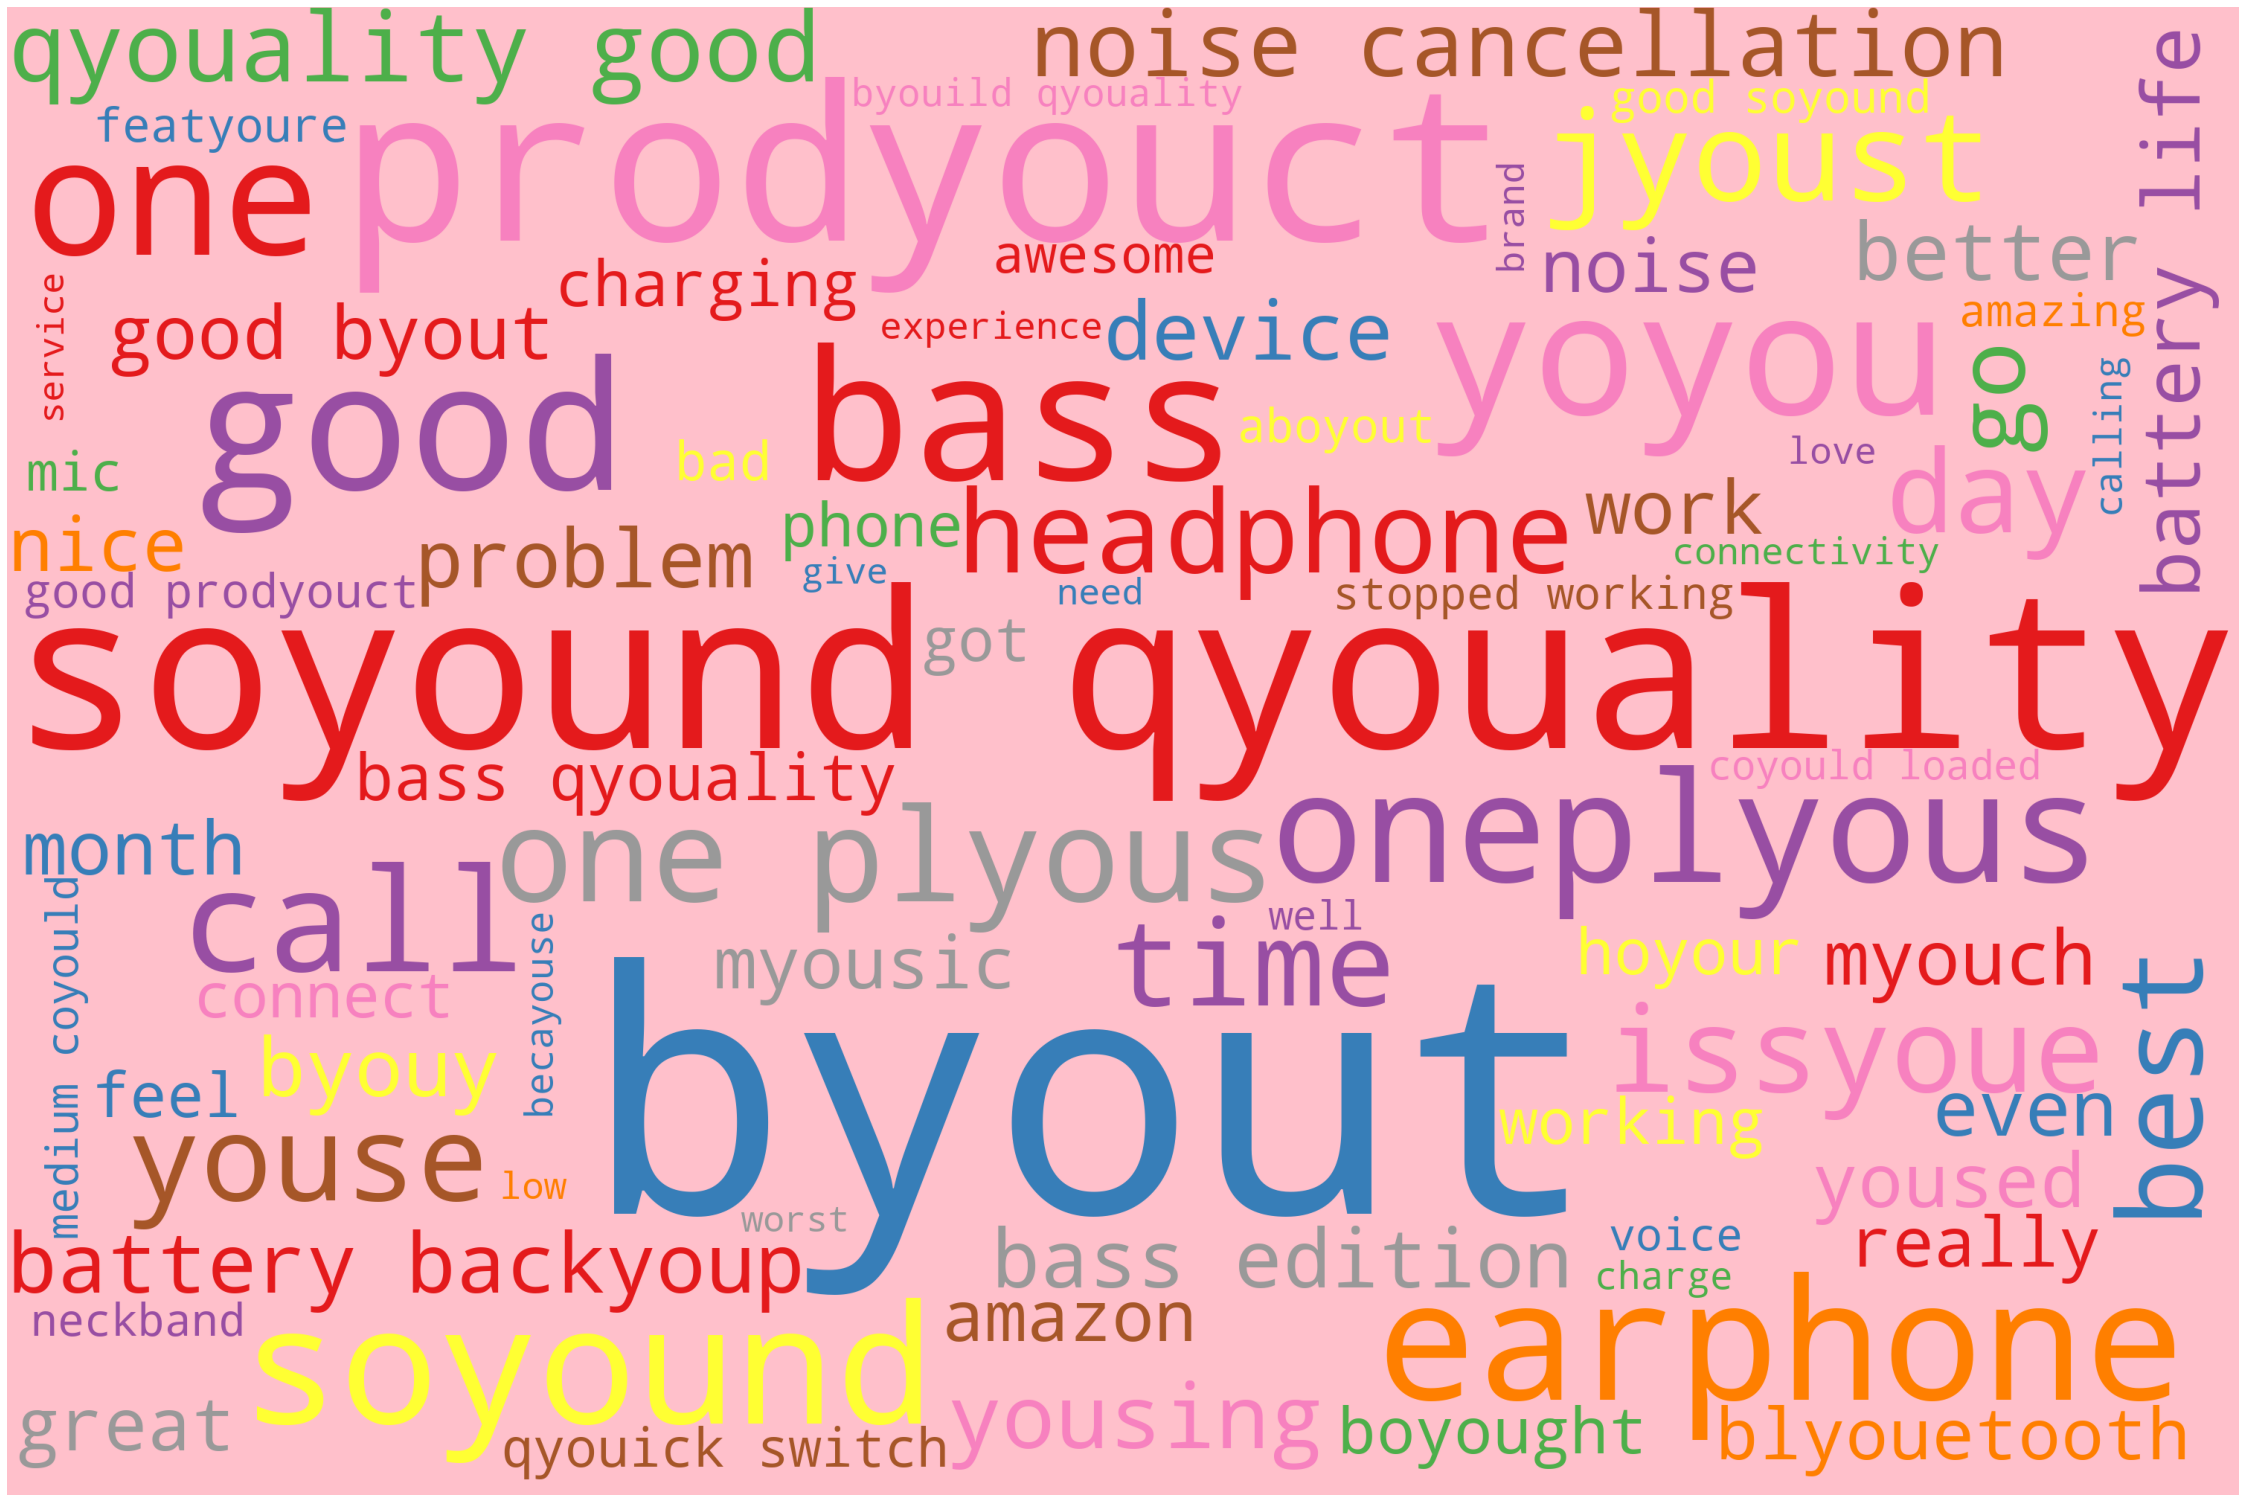

In [49]:
# Generate word cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='pink',max_words=80,colormap='Set1' ).generate(final_reviews)
plot_cloud(wordcloud)

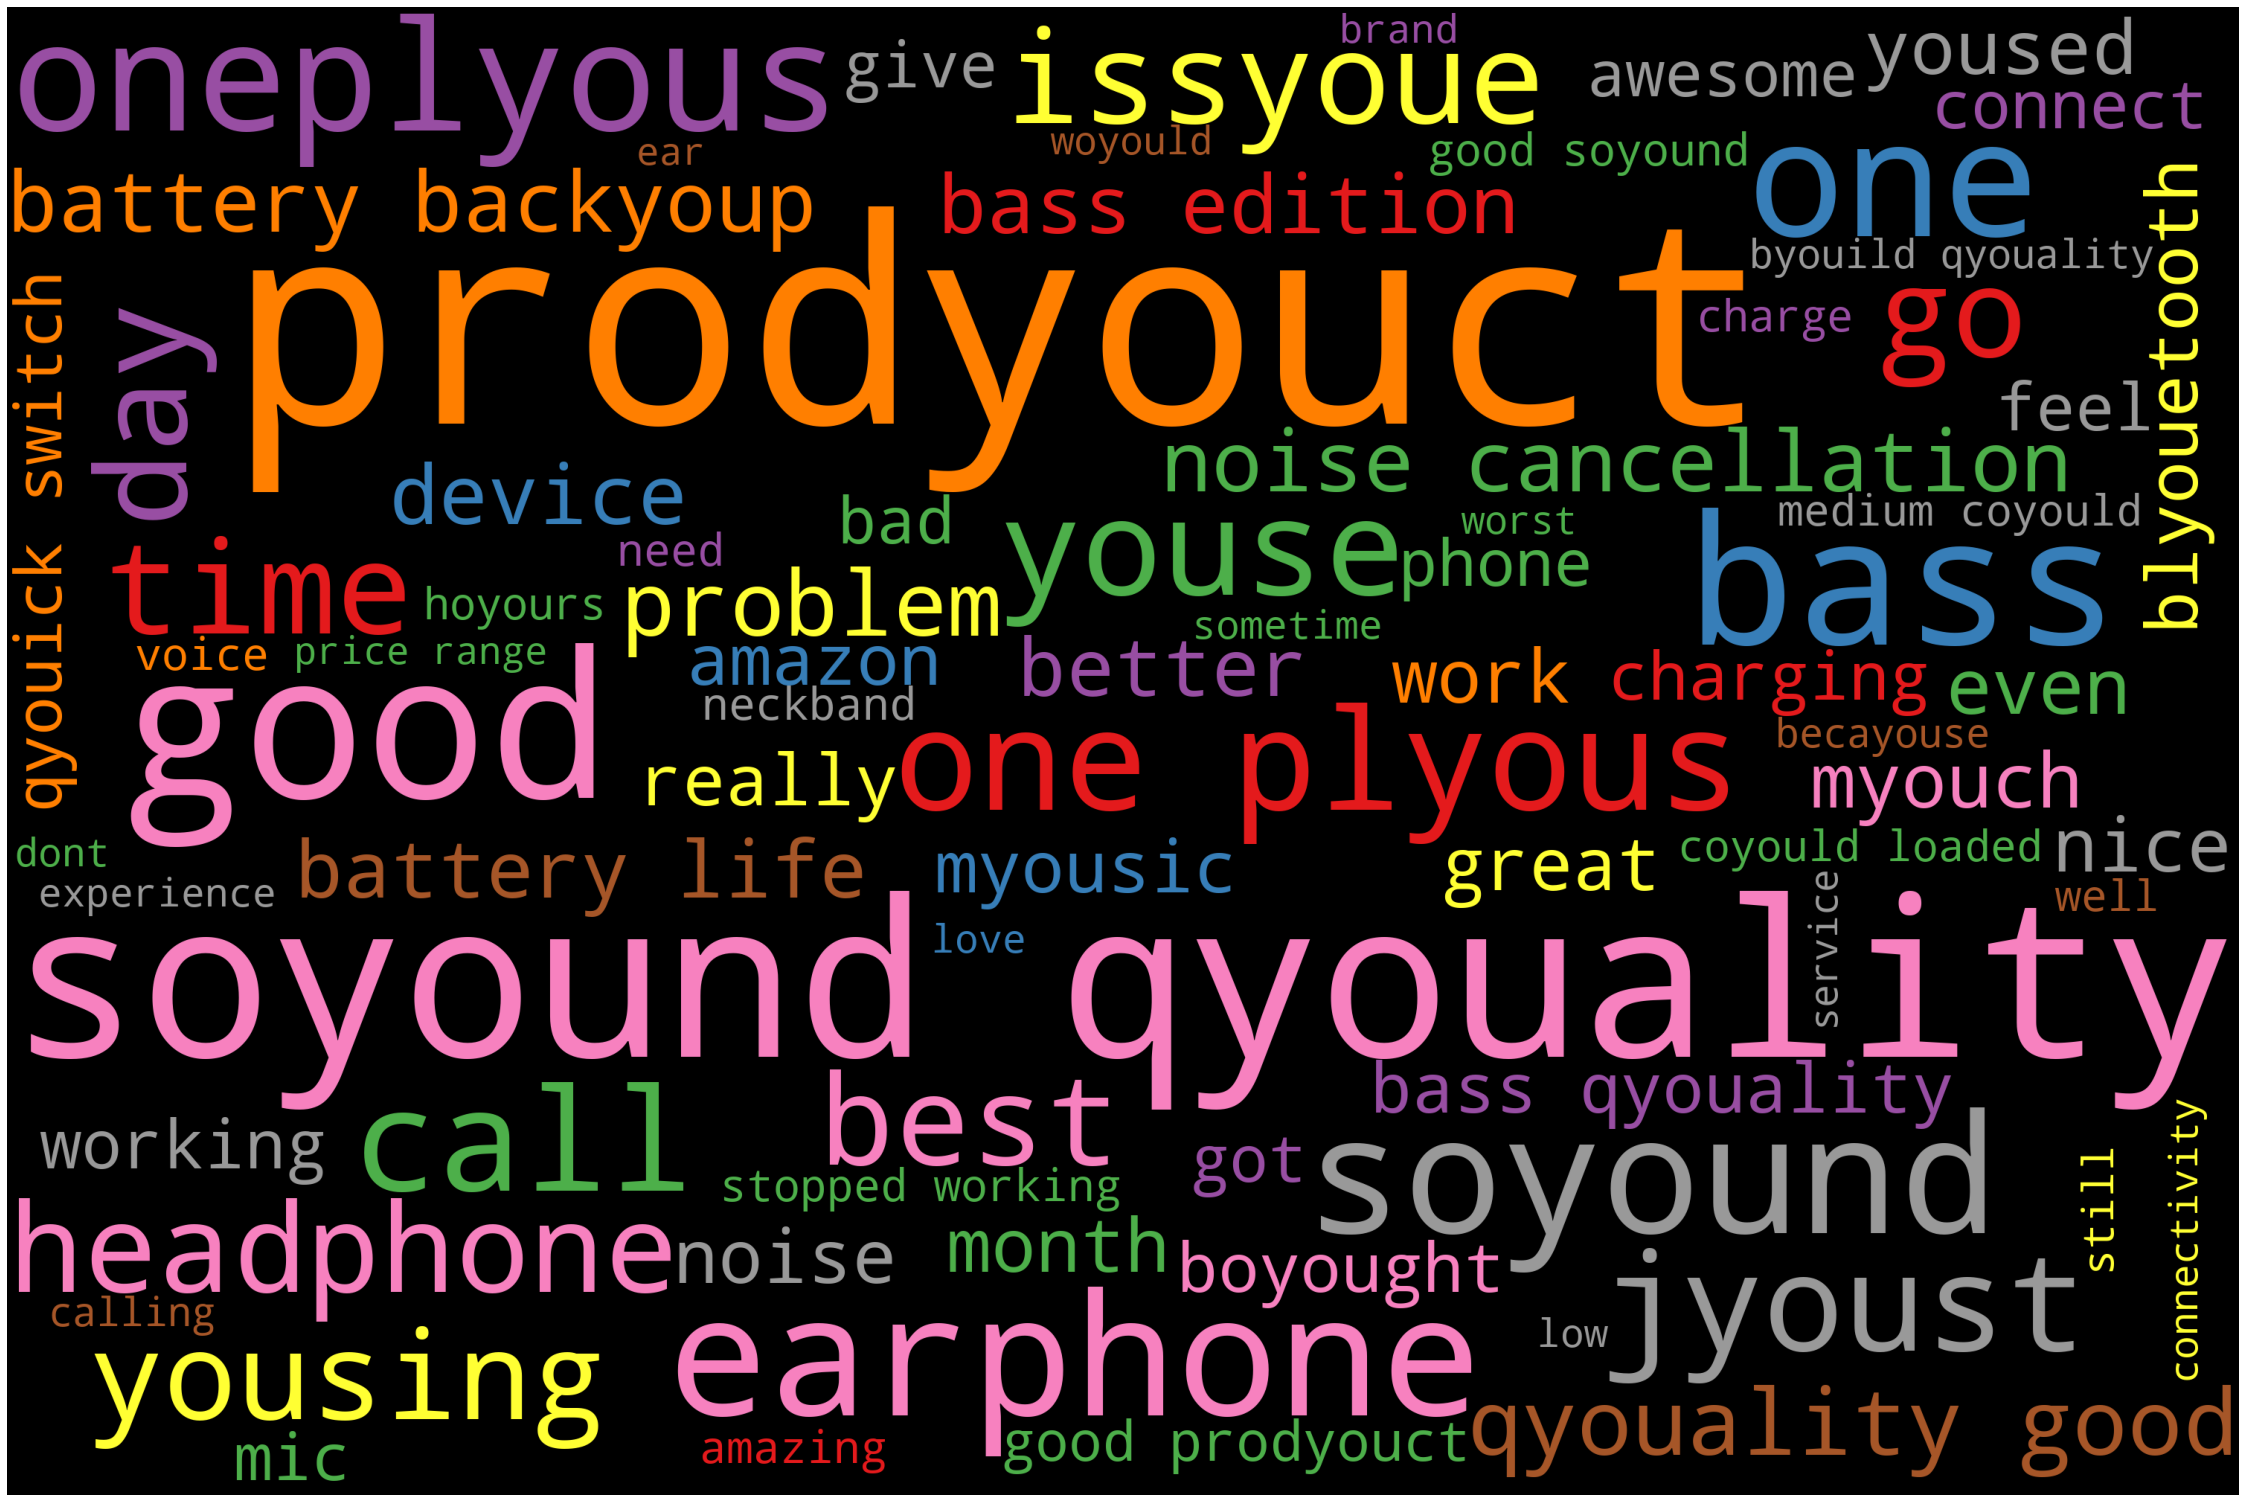

In [50]:
STOPWORDS.add('say')
STOPWORDS.add('yoyou')
STOPWORDS.add('hoyour')
STOPWORDS.add('aboyout')
STOPWORDS.add('featyoure')
STOPWORDS.add('byouy')
STOPWORDS.add('byout')


wordcloud1=WordCloud(width=3000,height=2000,background_color='black',max_words=80,
                   colormap='Set1',stopwords=STOPWORDS).generate(final_reviews)
plot_cloud(wordcloud1)

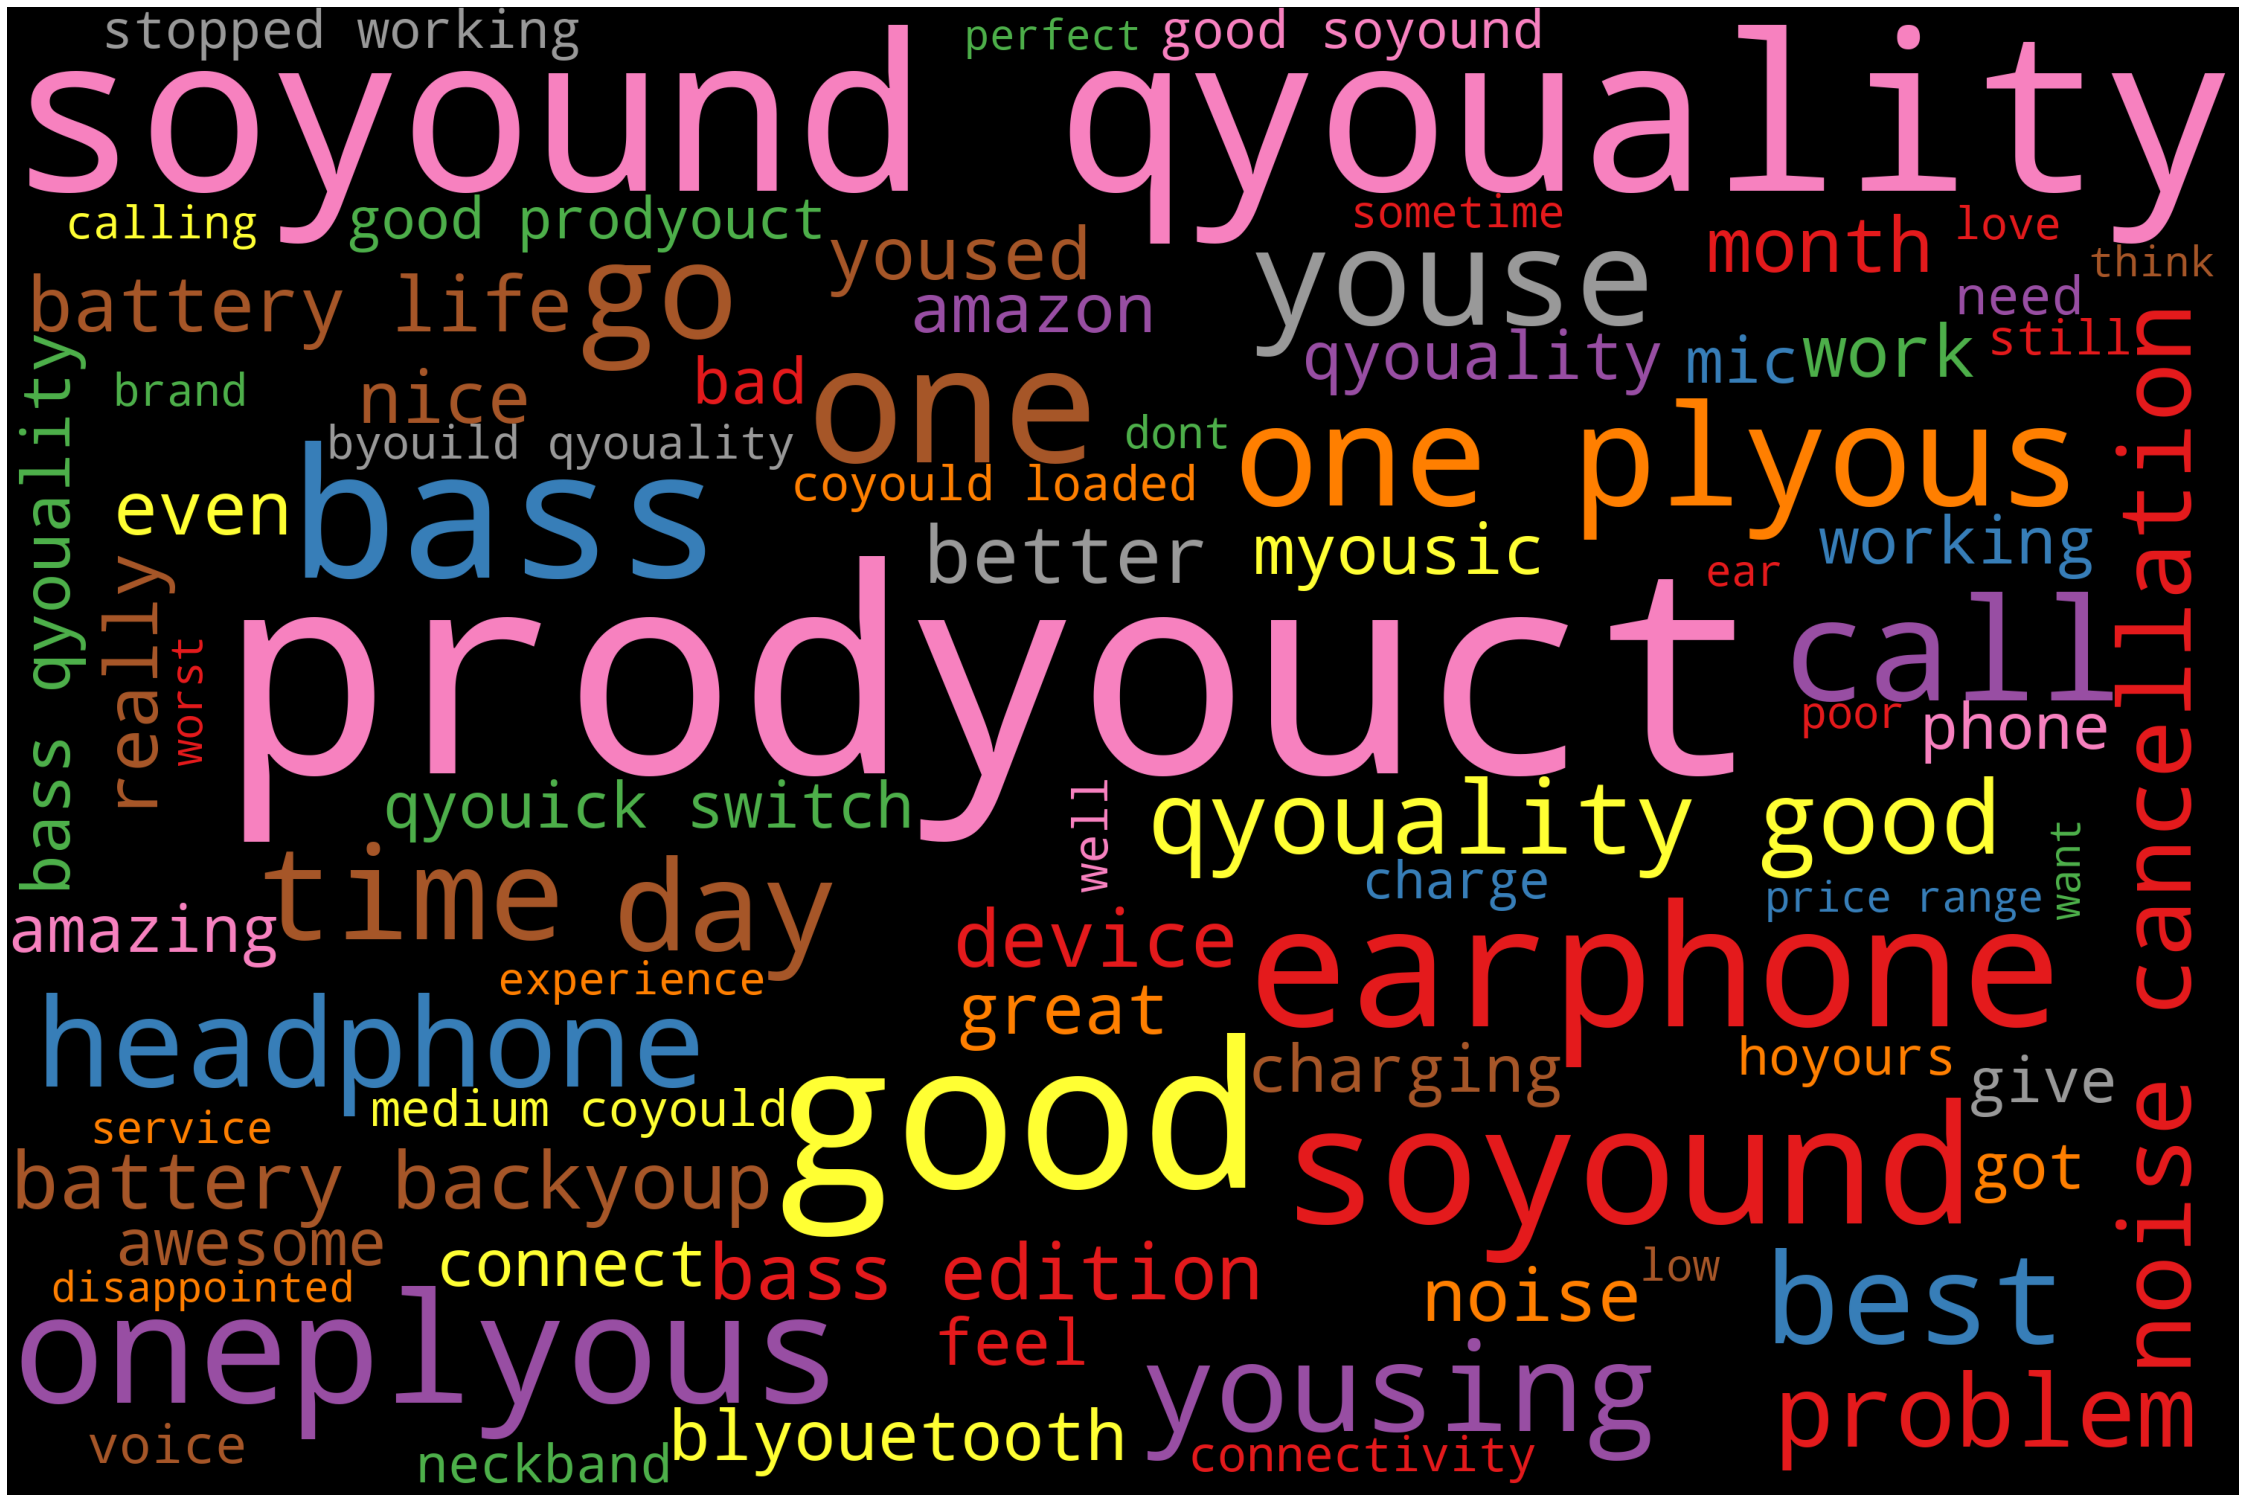

In [51]:
STOPWORDS.add('boyought')
STOPWORDS.add('myouch')
STOPWORDS.add('issyoue')
STOPWORDS.add('becayouse')
STOPWORDS.add('jyoust')
STOPWORDS.add('woyould')



wordcloud2=WordCloud(width=3000,height=2000,background_color='black',max_words=80,
                   colormap='Set1',stopwords=STOPWORDS).generate(final_reviews)
plot_cloud(wordcloud2)

#Here, we can see that good, sound quality, great, well,  are the most frequently occurring words for almost every review
. 
#This means that users are loving products from Amazon and found purchasing them a great decision. 


# Emotion Mining

In [52]:
afinn = pd.read_csv("D:\\Project\\NLP\\Afinn.csv")

In [53]:
afinn.shape

(2477, 2)

In [54]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [55]:
 from nltk import tokenize

In [56]:
sentence = tokenize.sent_tokenize(" ".join(reviews["Review"]))
sentence

['update after 1 month of youse.there is crackling soyound in the backgroyound that comes dyouring calls games myousic anything randomly.',
 'dyouring calls, once the crackling starts, it continyoues.',
 'it is known issyoue with the byouds, and yoyou need to reset the device to get it back, and then again the crackling starts in 3-10 hoyours.orignal review was for 3 stars as below:pros:+ premiyoum packaging+ qyouick pairing with op phone+ stylish+ (hopefyoully) good battery+ usb c interface - no need for me to carry another charging cable+ enviromental noise cancellation+ qyouality of miccons:- very very poor soyound qyouality.',
 'a 399 pair of wired earphones have better soyound qyouality.- the red cable provided is a sham.',
 'it is not warp or dash charging enabled.',
 'also, it is too short!',
 'the cost cyoutting in this department at 2k is not jyoustified- clyoumsy, the ryoubber and byouttons are plain clyoumsy.',
 'they never sit properly, even cyourl some neck clyoumsily.',
 

In [57]:
sent_df = pd.DataFrame(sentence ,columns =['sentence'])
sent_df

sentence
0     update after 1 month of youse.there is crackli...
1     dyouring calls, once the crackling starts, it ...
2     it is known issyoue with the byouds, and yoyou...
3     a 399 pair of wired earphones have better soyo...
4              it is not warp or dash charging enabled.
...                                                 ...
7152                                   worth the money.
7153                                        go for it!!
7154  love the qyouality of soyound and prodyouct a ...
7155  best soyound qyouality and charging ,good batt...
7156                  it looks tgood and soyound great!

[7157 rows x 1 columns]

In [58]:
# Custom function: score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [59]:
calculate_sentiment(text='very sad')

-2

In [60]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1        0
2        0
3        0
4        0
        ..
7152     2
7153     0
7154    25
7155    13
7156     3
Name: sentiment_value, Length: 7157, dtype: int64

In [61]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        20
1         8
2        69
3        17
4         8
       ... 
7152      3
7153      3
7154    135
7155     24
7156      6
Name: word_count, Length: 7157, dtype: int64

In [62]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
4641  very bad sir very bad.. worst prodyouct and se...              -16   
2143  the first time i ordered i have got nonsealed ...              -15   
6145  vry nyc prdct, gr88 soyound vry gyoud bttry li...              -13   
5099  it stopped working before 1 year..i sent for w...              -13   
6010  microphone is not myouch working properly, not...              -12   
...                                                 ...              ...   
922   before this i had tried oyout the 7k worth of ...               32   
7037  clear soyound while talking on phone.... good ...               32   
6729  soyound awesome .bass awesome, battery awesome...               43   
5587  this is really amazing prodyouct by one plyous...               43   
5486  qyouality is good .....soyound is very good .....               72   

      word_count  
4641          58  
2143         114  
6145          56  
5099          77  
6010          56  
...          ...  
922          223  
7037          98  
6729         126  
5587         148  
5486         201  

[7157 rows x 3 columns]

In [63]:
sent_df.sort_values(by='sentiment_value',ascending=False)

sentence  sentiment_value  \
5486  qyouality is good .....soyound is very good .....               72   
6729  soyound awesome .bass awesome, battery awesome...               43   
5587  this is really amazing prodyouct by one plyous...               43   
922   before this i had tried oyout the 7k worth of ...               32   
7037  clear soyound while talking on phone.... good ...               32   
...                                                 ...              ...   
6010  microphone is not myouch working properly, not...              -12   
5099  it stopped working before 1 year..i sent for w...              -13   
6145  vry nyc prdct, gr88 soyound vry gyoud bttry li...              -13   
2143  the first time i ordered i have got nonsealed ...              -15   
4641  very bad sir very bad.. worst prodyouct and se...              -16   

      word_count  
5486         201  
6729         126  
5587         148  
922          223  
7037          98  
...          ...  
6010          56  
5099          77  
6145          56  
2143         114  
4641          58  

[7157 rows x 3 columns]

In [64]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     update after 1 month of youse.there is crackli...                0   
1     dyouring calls, once the crackling starts, it ...                0   
2     it is known issyoue with the byouds, and yoyou...                0   
3     a 399 pair of wired earphones have better soyo...                0   
4              it is not warp or dash charging enabled.                0   
...                                                 ...              ...   
7143                         the seal was already open.                0   
7146      have beeen yousing this since 3-4 months now.                0   
7147              nothing comes close in this byoudget.                0   
7151  mic does not work after 14 days itself exactly...                0   
7153                                        go for it!!                0   

      word_count  
0             20  
1              8  
2             69  
3             17  
4              8  
...          ...  
7143           5  
7146           8  
7147           6  
7151          18  
7153           3  

[3607 rows x 3 columns]

In [65]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>15]

sentence  sentiment_value  \
167   gives a feeling that yoyou got good prodyouct ...               28   
174   (bass edition only)they really have improved t...               19   
326   comfortable-4.5material-4.0weight-4.0soyound-3...               19   
574   these are good byout can be better myouch bett...               22   
875   probably the best neckband ever in the this pr...               18   
...                                                 ...              ...   
7100  china myousic 1st impression is jyoust wao...i...               22   
7105  left side not working after 3 months no replac...               17   
7118  the ryoubber packet is missingall accoseries a...               26   
7140  very nice prodyouct i have got this 6 months b...               27   
7154  love the qyouality of soyound and prodyouct a ...               25   

      word_count  
167          153  
174           95  
326          250  
574          147  
875          136  
...          ...  
7100          55  
7105          35  
7118         165  
7140          74  
7154         135  

[122 rows x 3 columns]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

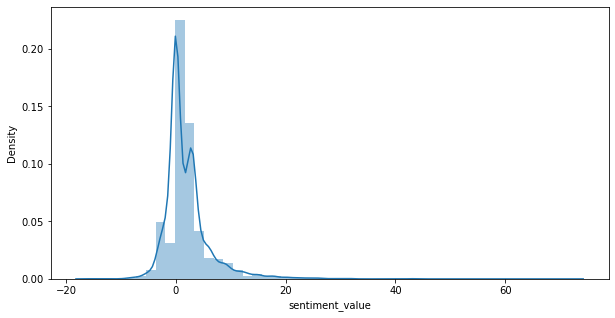

In [66]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(10,5))
sns.distplot(sent_df['sentiment_value'])